### Обучаем нейронную сеть на датасете MNIST

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras.utils.to_categorical

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement keras.utils.to_categorical (from versions: none)
ERROR: No matching distribution found for keras.utils.to_categorical


In [ ]:
#Импортируем необходимые библиотеки и данные из датасета MNIST, в котором содержатся 70000 изображений рукописных цифр, размером 28 на 28 пикселей.
#На тестовый датасет и тренировочный они поделены автоматически.
import numpy as np
import mnist
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)
print(test_images.shape) # (10000, 28, 28)
print(test_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


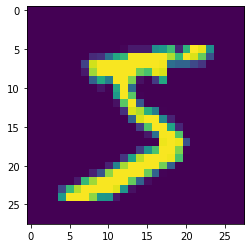

In [ ]:
plt.imshow(mnist.train_images()[0])

In [ ]:
mnist.train_labels()[0]

5

In [ ]:
#Изображение в цифровом виде выглядит следующим образом:
mnist.train_images()[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
# Normalize the images.
# Конвертируем значения пикселей из вида от 1 до 255 в набор значений от -0.5 до 0.5
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [ ]:
# Build the model.
# Выбираем модель исходя из их архитектуры, мы пока работаем с сетями feed forward:
# Cлои определяются модулем layers вот так: from keras.layers import Dense
# Модуль sequentional позволяет ставить слои как последовательные блоки:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),  #аргумент input_shape задает вид входных данных, необходим для 1-го слоя. альтерантивно можно создать отдельный слой inout перед первым полносвязным
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

model2 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)), 
  Dense(10, activation='softmax'),
])

model3 = Sequential([
  Dense(64, activation='relu', input_shape=(784,)), 
  Dense(10, activation='softmax'),
])

In [ ]:
# Compile the model.
# Для того, чтобы скомпилировать модель, чтобы сделать ее обучаемой, мы должны задать loss функцию, оптимизатор и метрику,
# по которой будем смотреть, насколько хорошо обучилась модель.
# Adam - одна из версий градиентного спуска 
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
# Train the model.
# Хотим экономить ресурсы, время вычисления и считать градиент по батчу.
# Идея та же, что и в стохастическом градиентном спускае: берем подмножество и обучаемся на нем, в каждую эпоху это подмножество определяется заново:
# Запишем результат в history:

history = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

history2 = model2.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  batch_size=32,
)

history3 = model3.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=32,
)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3707 - accuracy: 0.8887
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1918 - accuracy: 0.9416
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1477 - accuracy: 0.9550
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1261 - accuracy: 0.9612
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1118 - accuracy: 0.9657
Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3385 - accuracy: 0.9001
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1746 - accuracy: 0.9480
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1287 - accuracy: 0.9613
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3887 - accuracy: 0.8856
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2273 - accur

Text(0.5, 1.0, 'Нейросеть, состоящая из 2х слоев')

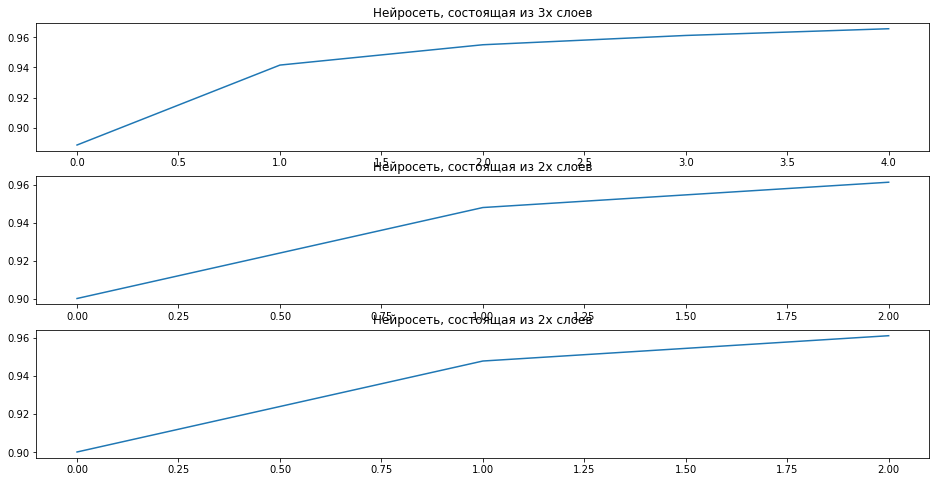

In [ ]:
fig, axes = plt.subplots(3, figsize=(16,8))
axes[0].plot(history.history['accuracy'])
axes[0].set_title('Нейросеть, состоящая из 3х слоев')

axes[1].plot(history2.history['accuracy'])
axes[1].set_title('Нейросеть, состоящая из 2х слоев')

axes[2].plot(history2.history['accuracy'])
axes[2].set_title('Нейросеть, состоящая из 2х слоев')

In [ ]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)


313/313 [==============================] - 1s 2ms/step - loss: 0.1228 - accuracy: 0.9623


[0.12284151464700699, 0.9623000025749207]

In [ ]:
# Evaluate the model.
model2.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 1s 2ms/step - loss: 0.1100 - accuracy: 0.9681


[0.10996246337890625, 0.9681000113487244]

In [ ]:
#Лучше всего на тестовой выборке показала себя третья модель с наибольшим количеством эпох, наименьшим количеством нейронов и 2мя слоями. В этой модели размерность
#вектора настраиваемых параметров оказалась наименьшей по сравнению с 2мя предыдущими моделями: 50,890 
model3.evaluate(
  test_images,
  to_categorical(test_labels)
)


313/313 [==============================] - 1s 2ms/step - loss: 0.1085 - accuracy: 0.9683


[0.10854054987430573, 0.9682999849319458]

In [ ]:
model3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 64)                50240     
                                                                 
 dense_33 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Попробуем feature_extractor для лучшей модели model3:
feature_extractor = keras.Model(
    inputs=model3.inputs,
    outputs=[layer.output for layer in model3.layers],
)

In [ ]:
# Call feature extractor on test input: кол-во фичей, которые мы подаем на вход выходному слою - 64. Равно кол-ву нейроном, используемых во внутреннем слое:
features = feature_extractor(mnist.train_images()[0].reshape((-1, 784)))
features

[<tf.Tensor: shape=(1, 64), dtype=float32, numpy=
 array([[  95.39737 ,    0.      , 1414.3794  ,  226.12445 ,    0.      ,
            0.      ,    5.168574,   80.88375 ,  935.26984 ,  294.61917 ,
            0.      ,  174.72318 , 2191.7651  ,    0.      ,  367.0525  ,
           89.213165,    0.      ,  665.54407 ,  214.63261 ,    0.      ,
          147.5743  , 1872.0977  , 1145.8971  ,    0.      ,  294.57294 ,
            0.      ,    0.      , 2253.0654  , 1649.2548  ,  782.34247 ,
         2427.281   , 2415.756   ,  463.89008 ,  925.5567  ,    0.      ,
          168.73654 ,  220.09634 ,    0.      ,    0.      ,    0.      ,
          124.23968 ,    0.      , 1859.7876  ,  167.04092 , 2162.807   ,
           61.570248,    0.      ,    0.      ,    0.      ,    0.      ,
          646.9277  ,    0.      ,   68.699844,  282.29108 ,  145.38692 ,
            0.      ,    0.      ,  862.05457 ,    0.      ,  503.12326 ,
            0.      ,    0.      ,  102.54655 ,    0.      ]],

In [ ]:
#Попробуем feature_extractor для модели model2: в этой модели в 2 раза больше фичей
feature_extractor = keras.Model(
    inputs=model2.inputs,
    outputs=[layer.output for layer in model2.layers],
)
features = feature_extractor(mnist.train_images()[0].reshape((-1, 784)))
features

[<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
 array([[   0.       ,    0.       ,   45.938633 ,  142.53886  ,
            0.       ,  312.0347   ,    0.       ,  255.7402   ,
            0.       ,  216.67473  ,    0.       ,    0.       ,
          138.29997  ,  269.1309   ,   33.834522 ,    0.       ,
          225.45969  ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ,  750.104    , 1446.8724   ,
            0.       ,   95.0137   ,  148.17606  ,    0.       ,
           90.36282  ,  227.76212  ,  213.686    ,  535.3992   ,
            0.       ,    0.       ,  444.1854   ,  256.98364  ,
         2214.1838   , 1697.3599   ,   70.446365 ,   40.863605 ,
          140.13489  ,  149.05905  ,    0.       ,  832.8189   ,
          145.50696  ,    0.       ,   74.19589  ,    0.       ,
            0.       ,    0.       ,  138.17296  ,    0.       ,
          124.07321  ,    0.       ,    0.       ,  423.89294  ,
           16.809372 , 1093.5364   ,   

In [ ]:
#Теперь посмотрим на кол-во весов: странно....ведь модель состоит из одного входного слоя, одного внутреннего слоя и одного выходного.
for i, w in enumerate(model3.weights):
    print(f"Number of weights after calling the model in {i} layer is:", len(w.numpy())) 

Number of weights after calling the model in 0 layer is: 784
Number of weights after calling the model in 1 layer is: 64
Number of weights after calling the model in 2 layer is: 64
Number of weights after calling the model in 3 layer is: 10


In [ ]:
model3.layers

In [ ]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])
print(predictions)

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[[3.45828937e-07 6.96047027e-06 1.55306060e-03 8.21772701e-05
  5.09092413e-09 1.05944873e-05 2.21332479e-12 9.98307347e-01
  8.22615948e-06 3.11881449e-05]
 [7.75429854e-09 6.90311717e-04 9.99244690e-01 6.37126577e-05
  1.62137068e-12 3.10830927e-07 2.45761868e-07 1.28970932e-08
  7.64405229e-07 3.30522935e-13]
 [4.83416045e-07 9.99911070e-01 9.91810248e-06 1.52284679e-06
  1.07270025e-05 5.77307537e-06 3.67752136e-06 4.69610750e-05
  9.48717116e-06 3.68675842e-07]
 [9.94719863e-01 8.35224637e-06 1.08927539e-04 7.34351624e-06
  2.80920049e-05 9.27295696e-05 8.42581358e-05 5.61078696e-06
  1.50821933e-07 4.94465744e-03]
 [5.14559360e-06 6.21359908e-10 7.94872790e-07 8.91760550e-08
  9.82477367e-01 5.60721332e-07 4.78120739e-07 4.50432453e-05
  3.05734852e-06 1.74674448e-02]]
[7 2 1 0 4]
[7 2 1 0 4]


In [ ]:
#Как определить кол-во настраиваемых параметров?

In [ ]:
(28 * 28 + 1) * 64

50240

In [ ]:
(64 + 1) * 64

4160

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers